In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [29]:
train_url = "https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/refs/heads/master/train.csv"
test_url = "https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/refs/heads/master/test.csv"

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
print(train_df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [31]:
print(test_df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [32]:
combined = pd.concat([train_df, test_df], sort=False)

cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
num_cols = ['LoanAmount']

combined[cat_cols] = combined[cat_cols].fillna(combined[cat_cols].mode().iloc[0])
combined[num_cols] = combined[num_cols].fillna(combined[num_cols].median())

In [33]:
encoder = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    combined[col] = encoder.fit_transform(combined[col])
combined['Dependents'] = combined['Dependents'].replace('3+', 3).astype(int)

In [34]:
train = combined[:len(train_df)].copy()
test = combined[len(train_df):].copy()
train['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

In [35]:
X_train = train.drop(columns=['Loan_ID', 'Loan_Status','Gender'])
y_train = train['Loan_Status']
X_test = test.drop(columns=['Loan_ID'])

In [36]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

🔍 Logistic Regression Evaluation:
Confusion Matrix:
[[ 84 108]
 [  7 415]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.44      0.59       192
           1       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614

ROC AUC Score: 0.7615644747235387


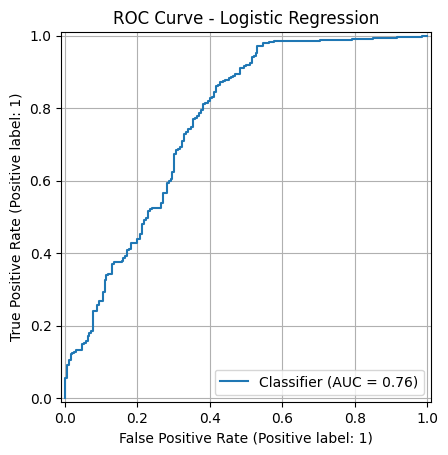

🔍 Random Forest Evaluation:
Confusion Matrix:
[[192   0]
 [  0 422]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

ROC AUC Score: 1.0


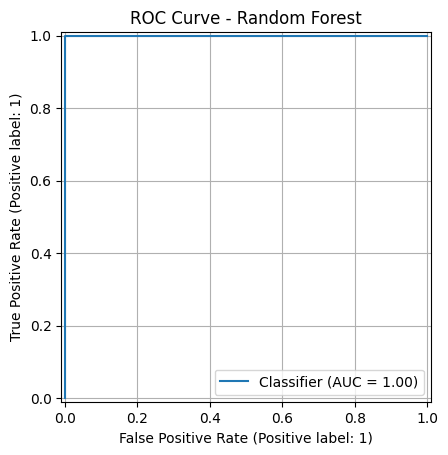

In [37]:
from sklearn.metrics import RocCurveDisplay

def evaluate_model(name, model):
    y_pred = model.predict(X_train)
    y_prob = model.predict_proba(X_train)[:, 1]

    print(f"🔍 {name} Evaluation:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, y_pred))
    print("Classification Report:")
    print(classification_report(y_train, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_train, y_prob))

    RocCurveDisplay.from_predictions(y_train, y_prob)
    plt.title(f"ROC Curve - {name}")
    plt.grid(True)
    plt.show()

evaluate_model("Logistic Regression", log_reg)
evaluate_model("Random Forest", rf_model)

In [38]:
X_test = test.drop(columns=['Loan_ID', 'Loan_Status','Gender'], errors='ignore')

# Make predictions
test_ids = test_df['Loan_ID']
predictions = rf_model.predict(X_test)

# Format the submission
submission = pd.DataFrame({
    'Loan_ID': test_ids,
    'Loan_Status': ['Y' if i == 1 else 'N' for i in predictions]
})

# Save prediction and model
submission.to_csv("loan_predictions.csv", index=False)
joblib.dump(rf_model, "loan_model.pkl")

print("✅ Model and predictions saved.")

✅ Model and predictions saved.


In [39]:
from google.colab import files
files.download("loan_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>